# The Sparks Foundation - Internship

# Janani M

# Data Science and Business Analytics

# TASK 2

# Task Description : Predict the optimum number of clusters from the given 'Iris' dataset and represent it virtually using unsupervised ML

## Importing the libraries

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [73]:
iris_dataset = pd.read_csv('Iris.csv')
X = df.iloc[:, [1,3,4]].values 
# Neglecting Sepal_Width as it does not have unique separable values among the three species 
# Hence making the clustering more efficient
iris_dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [74]:
print(df.Species.unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


## Using the elbow method to find the optimal number of clusters

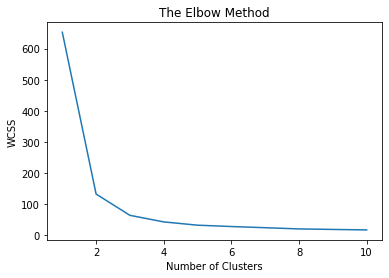

In [75]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# The optimum number of clusters would be '3' as seen from the above plot as the “elbow” i.e, the point after which the distortion/inertia starts decreasing in a linear fashion.

## Training the K-Means model on the dataset

In [76]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [77]:
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


## Visualising the clusters

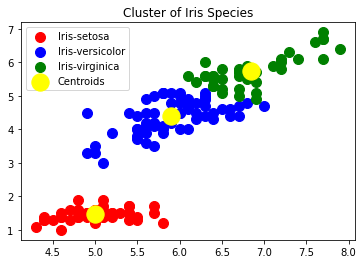

In [78]:
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s = 100, c = 'red',label = 'Iris-setosa')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s = 100, c = 'blue',label = 'Iris-versicolor')
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s = 100, c = 'green',label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Cluster of Iris Species')
plt.legend()
plt.show()